# Exercises: Basics of Sound Waves

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib notebook
%matplotlib inline

(1.1.1) Create a Python function that describes a pressure wave impinging on a microphone. 
Assume that the sound wave is a sustained, pure tone of frequency $f$ and amplitude $A$, and that $p(0) = 0$.
Note that this function represents our *temporal waveform*: the function that you create is defined on a continuous domain.
While this represents a continuous mathematical function, we must work with concrete numbers when plotting and analyzing these functions on a computer.
Thus we will evaluate this function at a discrete set of times.

Note that the following function signature makes use of [type hints](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Writing_Good_Code.html#Type-Hinting). 
Furthermore, the arguments `amp` and `freq` come after the `*` character in the signature, which means that they are keyword-only arguments in our function. 
This is to prevent us from accidentally swapping numbers when we pass our numbers into it.

In [2]:
def pressure(times: np.ndarray, *, amp: float, freq: float) -> np.ndarray:
    """Describes the temporal waveform of a pure tone impinging on a 
    microphone at times `times` (an array of times). The wave has 
    an amplitude `amp`, measured in Pascals, and a frequency 
    `freq`, measured in Hz.
    
    Parameters
    ----------
    times : numpy.ndarray, shape=(N,)
        The times at which we want to evaluate the sound wave
    
    amp : float
        The wave's amplitude (measured in Pascals - force per unit area)
    
    freq : float
        The wave's frequency (measured in Hz - oscillations per second)
    
    Returns
    -------
    numpy.ndarray, shape=(N,)
        The pressure at the microphone at times `t`

    Notes
    -----
    We only care about the wave at a fixed location, at the microphone, 
    which is why we do not have any spatial component to our wave. 
    """
    # 
    # STUDENT CODE HERE
    pressures = amp * np.cos(2*np.pi*times*freq)
    return pressures

(1.1.2) As stated above, the function that you just wrote can be thought of as a representation of the temporal waveform that is recorded by our microphone: it represents the continuous fluctuations in air density associated with a sound wave.
We can "sample" this function by evaluating the function at specific times. 

Evaluate the temporal waveform for a $C_{4}$-note ($261.63 \:\mathrm{Hz}$) played for $3$ seconds with an amplitude of $0.06\:\mathrm{Pascals}$ **using the sampling rate 44100 Hz (samples per second)**.
That is, evaluate your function at evenly-spaced times according to this sampling rate for a time duration of $3$ seconds. 

You can compute the times at which you will evaluate your function using:

```python
duration = 3 # seconds
sampling_rate = 44100 # Hz
n_samples = int(duration * sampling_rate) + 1

# the times at which you should sample your temporal waveform
times = np.arange(n_samples) / sampling_rate  # seconds
```

You should ultimately produce an array, `c_4`, of pressure values associated with this pure tone.

Include comments where appropriate to indicate the physical units of measurements associated with the quantities involved.

In [3]:
# STUDENT CODE HERE
duration = 3 # seconds
sampling_rate = 44100 # Hz
n_samples = int(duration * sampling_rate) + 1

# the times at which you should sample your temporal waveform
times = np.arange(n_samples) / sampling_rate  # seconds

c_4 = pressure(times, amp=0.06, freq=261.63)

Play the $3$-second audio using

```python
from IPython.display import Audio
Audio(c_4, rate=44100)
```
Note that `Audio` automatically normalized the volume according to its slider, so the amplitude that we set will have no effect.
Adjusting the amplitude would typically manifest as a change in volume!

In [4]:
# STUDENT CODE HERE
from IPython.display import Audio

In [5]:
Audio(c_4, rate=44100)

(1.1.3) Using `pressure(...)`, plot **4 periods (repetitions) of the sound wave**. Label the $x$- and $y$-axes, including the units of the values being plotted.
Use enough points to make the plot look smooth.

Here is some pseudocode for plotting:

```python
fig, ax = plt.subplots()
t = # array/sequence of times
pressures = # array/sequence of pressure samples
ax.plot(t, pressures)
ax.set_ylabel("Pressure [Pa]")
ax.set_xlabel("Time [s]");
```

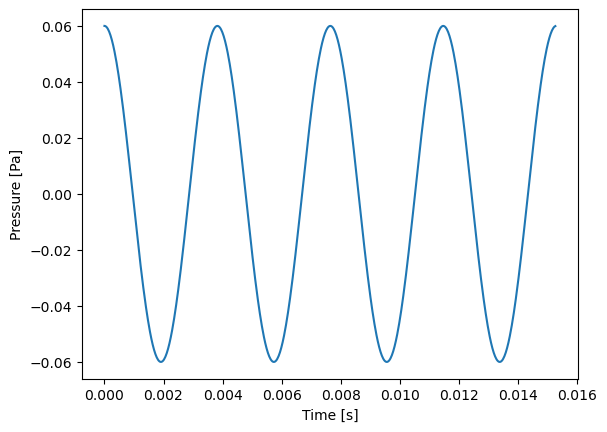

In [6]:
# STUDENT CODE HERE
fig, ax = plt.subplots()
period = sampling_rate / 261.63
t = times[:674] # array/sequence of times
pressures = c_4[:674] # array/sequence of pressure samples
ax.plot(t, pressures)
ax.set_ylabel("Pressure [Pa]")
ax.set_xlabel("Time [s]");

(1.1.4) **Leveraging the principle of superposition**, plot the waveform of the C-major triad for $0.64$ seconds. This should combine three pure tones of equal amplitudes ($0.01 \;\mathrm{Pa}$) of the following respective frequencies:

 - 523.25 Hz (C)
 - 659.25 Hz (E)
 - 783.99 Hz (G)
 
Use the same sampling rate of $44,100\; \mathrm{Hz}$ to determine the times at which you will evaluate this temporal waveform.

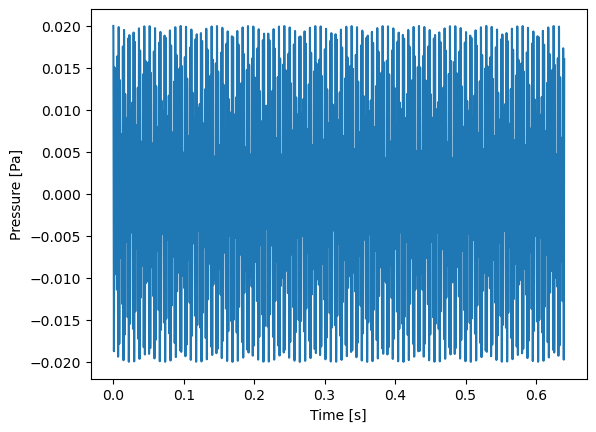

In [7]:
# STUDENT CODE HERE
duration = 0.64 # seconds
sampling_rate = 44100 # Hz
n_samples = int(duration * sampling_rate) + 1

# the times at which you should sample your temporal waveform
times = np.arange(n_samples) / sampling_rate  # seconds

pressure_c = pressure(times, amp=0.01, freq=523.25)
pressure_e = pressure(times, amp=0.01, freq=659.25)
pressure_g = pressure(times, amp=0.01, freq=783.99)

pressures = np.add(pressure_c, pressure_e, pressure_g)

fig, ax = plt.subplots()
ax.plot(times, pressures)
ax.set_ylabel("Pressure [Pa]")
ax.set_xlabel("Time [s]");

Play the major triad audio clip for $3$ seconds.

In [8]:
# You might want to turn down the volume on your computer a bit
Audio(pressures, rate=44100)
# STUDENT CODE HERE

Isn't it beautiful?
Notice how messy looking the waveform is. It is wholly unintuitive to look at the data in this way, even though it is only comprised of $3$ simple notes.
In an upcoming section, we will see that we can convert this *amplitude-time* data into *amplitude-frequency* data, which is much more useful for us!
This conversion process is known as a **Fourier Transform**. 

(1.1.5) Lastly, define a function that describes a pressure wave for **noise**.
That is, use `numpy.random.rand` ([docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)) to generate samples randomly between $0$ and $1$).
Plot some of its temporal waveform for a duration of $0.05$ seconds, using a sampling rate of $44,100$ Hertz.

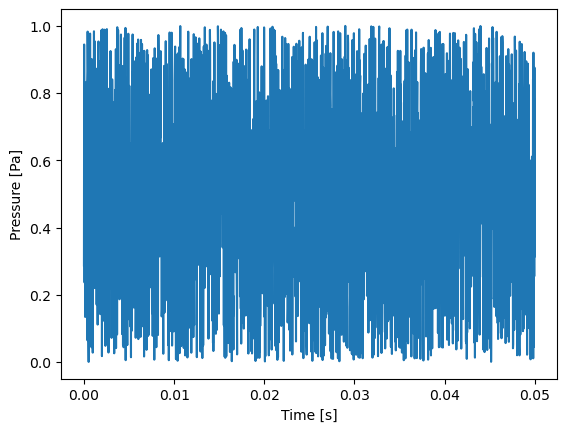

In [9]:
# STUDENT CODE HERE
def noise(times):
    return np.random.rand(times.shape[0])

duration = 0.05
sampling_rate = 44100 # Hz
n_samples = int(duration * sampling_rate) + 1

# the times at which you should sample your temporal waveform
times = np.arange(n_samples) / sampling_rate  # seconds
my_noise = noise(times)

fig, ax = plt.subplots()
ax.plot(times, my_noise)
ax.set_ylabel("Pressure [Pa]")
ax.set_xlabel("Time [s]");

Now play 3 seconds of noise!

In [10]:
# STUDENT CODE HERE
Audio(my_noise, rate=(44100))